# Lab 7: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation.html)

Please complete this notebook by filling in the cells provided. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. For all problems that you must write out explanations, you **must** provide your answer in the designated space. Moreover, throughout this lab and all future ones, please be sure to not re-assign variables throughout the notebook! 

In [1]:
# Don't change this cell; just run it.   

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Election Polls


East Carolina University [conducted a poll](https://surveyresearch-ecu.reportablenews.com/pr/nc-senate-budd-maintains-lead-over-beasley-as-election-day-nears) from November 1st through 3rd in 2022 of likely voters in the U.S. Senate election in North Carolina. The data for the poll were drawn from a cellphone sample of SMS-to-web provided by Consensus Strategies, an Interactive Voice Response (IVR) system of landlines only, and an online panel provided by Bovitz. To ensure the sample was representative of the midterm electorate, the data were weighted by gender, age, education, race, region, and election modeling based on previous statewide elections in North Carolina.

The poll showed Republican Ted Budd leading Democrat Cheri Beasley, 52% to 46%, among likely voters, with just 1% of the poll respondents reporting they are undecided (and the remaining 1% expressing support for some other candidate).

|Responses  | Percentage|
|:------------:|:------------:|
|Ted Budd | 52% |
|Cheri Beasley | 46% |
|Undecided | 1% |
|Some other candidate | 1% |

We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each response will receive from the entire population (the entire population is all NC voters). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates. Now that the election has occurred, we could compare this with the actual result.

The table `poll2022` contains the results of the survey. The percentages above were rounded to the nearest percent.

In [2]:
# Just run this cell
poll2022 = Table.read_table('poll2022.csv')
poll2022.group('Response').sort('count', True)

Response,count
Ted Budd,610
Cheri Beasley,548
Undecided,13
Shannon W. Bray,8
Mathew Hoh,4
Write-in Candidate,1


**Question 1.1.** Complete the function `one_resampled_percentage` below. It should return Cheri Beasley's **percentage** of votes after simulating one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `poll2022`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [11]:
def one_resampled_percentage(tbl):
    bootstrap = tbl.sample()
    count = bootstrap.where('Response', are.equal_to('Cheri Beasley')).num_rows
    return count
    
one_resampled_percentage(poll2022)

562

**Question 1.2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Cheri Beasley. You should use the `one_resampled_percentage` function you wrote above.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [12]:
def percentages_in_resamples():
    percentage_Beasley = make_array()
    for i in np.arange(2500):
        percentage = one_resampled_percentage(poll2022)
        percentage_Beasley = np.append(percentage_Beasley, percentage)
    return percentage_Beasley

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Cheri Beasley. Based on what the original election poll percentages were, does the graph seem reasonable? 

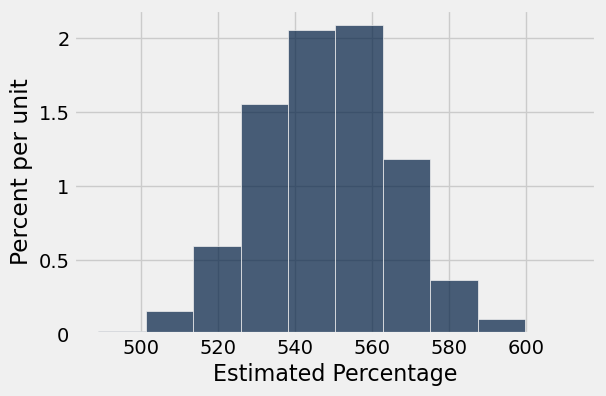

In [13]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 1.3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `Beasley_lower_bound` and `Beasley_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [14]:
Beasley_lower_bound = np.percentile(resampled_percentages, 2.5)
Beasley_upper_bound = np.percentile(resampled_percentages, 97.5)
print("Bootstrapped 95% confidence interval for the percentage of Cheri Beasley voters in the population: [{:f}, {:f}]".format(Beasley_lower_bound, Beasley_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Cheri Beasley voters in the population: [515.000000, 582.000000]


**Question 1.4.** In the survey Ted Budd is leading all of the other candidates or responses combined. In some states (such as Georgia, but not North Carolina) a candidate must receive 50% or more of the votes or a runoff election is held. We would like to use confidence intervals to determine a range of likely values for Ted Budd's true lead over all the other candidates or responses combined. 

Define the function `one_resampled_difference` that returns **exactly one value** of Ted Budd's percentage lead over all other candidates, as well as undecided voters combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [15]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    Budd_percentage = 100 * bootstrap.where('Response', 'Ted Budd').num_rows / bootstrap.num_rows
    Remaining_percentage = 100 - Budd_percentage
    return Budd_percentage - Remaining_percentage

**Question 1.5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Ted Budd's lead over the other responses combined. 

**Note:** Tedd Budd's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

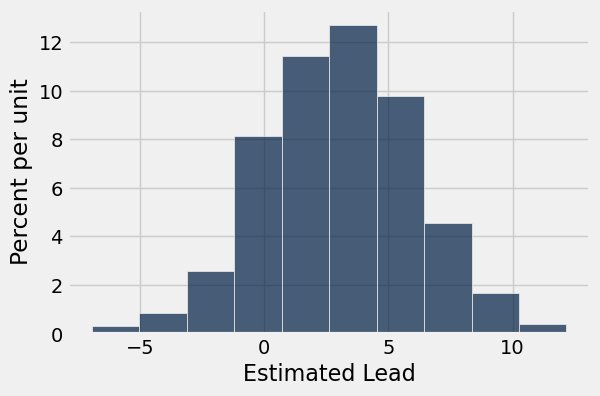

In [16]:
def leads_in_resamples():
    percentage_array = make_array()
    for i in np.arange(2500):
        percentage = one_resampled_difference(poll2022)
        percentage_array = np.append(percentage_array, percentage)
    
    return percentage_array

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

**Question 1.6.** Use the simulated data from Question 1.5 to compute an approximate 95% confidence interval for Ted Budd's true lead over the other responses combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [18]:
diff_lower_bound = np.percentile(sampled_leads, 2.5)
diff_upper_bound = np.percentile(sampled_leads, 97.5)
print("Bootstrapped 95% confidence interval for Ted Budd's true lead over the other responses combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Ted Budd's true lead over the other responses combined: [-2.871622, 8.783784]


## 2. Interpreting Confidence Intervals


Dr. McLean computed the following **90%** confidence interval for the percentage of Cheri Beasley's voters: 

$$[43.9, 48.6]$$

**Question 2.1.** Can we say there is a 90% probability that the interval [43.9, 48.6] contains the true percentage of the population that votes for Cheri Beasley for US Senate in North Carolina (based on the sample from this poll, supposing that we do not know the election results)? Answer "yes" or "no" and explain your reasoning. 

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

*Yes, because the confidence interval we are working at states we are 90% confident the true result is inside of the interval. It's a prediction, we're not going to need to do anything like this if we have the true results.*

**Question 2.2.** Dr. McLean also created 75%, 82%, and 99% confidence intervals from the same sample, but he forgot to label which confidence interval represented which percentages! Match each confidence level (75%, 82%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [42.7, 50.0]$\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [42.7, 50.0]
* [44.6, 48.0]
* [44.3, 48.2]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

*75% CI: [44.6, 48.0]
82% CI: [44.3, 48.2]
99% CI: [42.7, 50.0]
I ordered these by measuring the difference between the two numbers in each interval and assigning the highest CI with the largest difference. We would be more confident in our results with a larger spread of possibilities.*

**Question 2.3.** Suppose that we collect 600 new samples (each one a uniform random sample of likely voters in North Carolina of the same size as the original poll) from the population and created an 80% confidence interval from each one. Roughly how many of those 600 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [19]:
true_percentage_intervals = 600 * .8
true_percentage_intervals

480.0

Recall the second bootstrap confidence interval you created, which estimated Ted Budd's lead over the other candidates and responses combined. Dr. McLean's 99% confidence interval for the true lead (in the population of all voters) was

$$[-4.4, 10.8]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Tedd Budd tied with the percentage of votes for the remaining candidates and responses combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Ted Budd's lead is exactly 0. Our alternative hypothesis is that Ted Budd's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only Dr. McLean's 99% confidence interval.


**Question 2.4.** Say we use a 1% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using Dr. McLean's 99% confidence interval?

Assign `responses_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [20]:
responses_tied = 2

**Question 2.5.** What if, instead, we use a P-value cutoff of 0.1%? Do we reject the null, fail to reject the null, or are we unable to tell using Dr. McLean's confidence interval?

Assign `cutoff_one_tenth_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [21]:
cutoff_one_tenth_percent = 3

**Question 2.6.** What if we use a P-value cutoff of 5%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_five_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [22]:
cutoff_five_percent = 2